In [2]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np;
import seaborn as sns; sns.set()
import matplotlib.animation as animation

import pandas as pd

matplotlib.use('Agg')


In [3]:
class agent:
    def __init__(self):
        self.epsilon = 0.1
        self.alpha = 0.5
        self.episodes = 200
        self.gamma = 1
        self.returns = np.zeros((self.episodes))
    
        self.env = gym.make('CliffWalking-v0')
        self.numStates = self.env.observation_space.n
        self.numActions = self.env.action_space.n
        self.Q = np.zeros([self.numStates, self.numActions])
        self.E = np.zeros([self.numStates, self.numActions])

    def pick_action(self, state):
        if np.random.rand() <= self.epsilon:
            action = np.random.randint(self.numActions)
        else:
            action = np.argmax(self.Q[state])
        return action
            
    def sarsa(self, _lambda):
        i = 0
        for episode in range(self.episodes):
            state = self.env.reset()
            action = self.pick_action(state)
            done=False
            while not done:
                next_state, reward, done, info = self.env.step(action)
                action_prime = self.pick_action(next_state)
                td_error = reward + self.gamma*self.Q[next_state, action_prime] - self.Q[state, action]
                self.E[state,action] += 1
                for i in range(self.numStates):
                    for j in range(self.numActions):    
                        self.Q[i,j] += self.alpha*td_error*self.E[i,j]
                        self.E[i,j] *= _lambda * self.gamma
                        
                self.returns[episode] += self.Q[state,action]
                state = next_state
                action = action_prime
            if episode == 0:
                value_function = np.max(self.Q, axis=1)
            else:
                value_function = np.vstack((value_function, np.max(self.Q, axis=1)))
        return value_function
           

### Compute the Average Returns

In [4]:
_lambda = [0,0.3,0.5]
average_returns = np.zeros((3,200))

episodes = np.arange(200)
j = 0
for l in _lambda:
    for i in np.arange(100):
        sarsa_agent = agent()
        sarsa_agent.sarsa(l)
        average_returns[j] += sarsa_agent.returns
        print(i)
    j += 1

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


### Plot the Average Returns

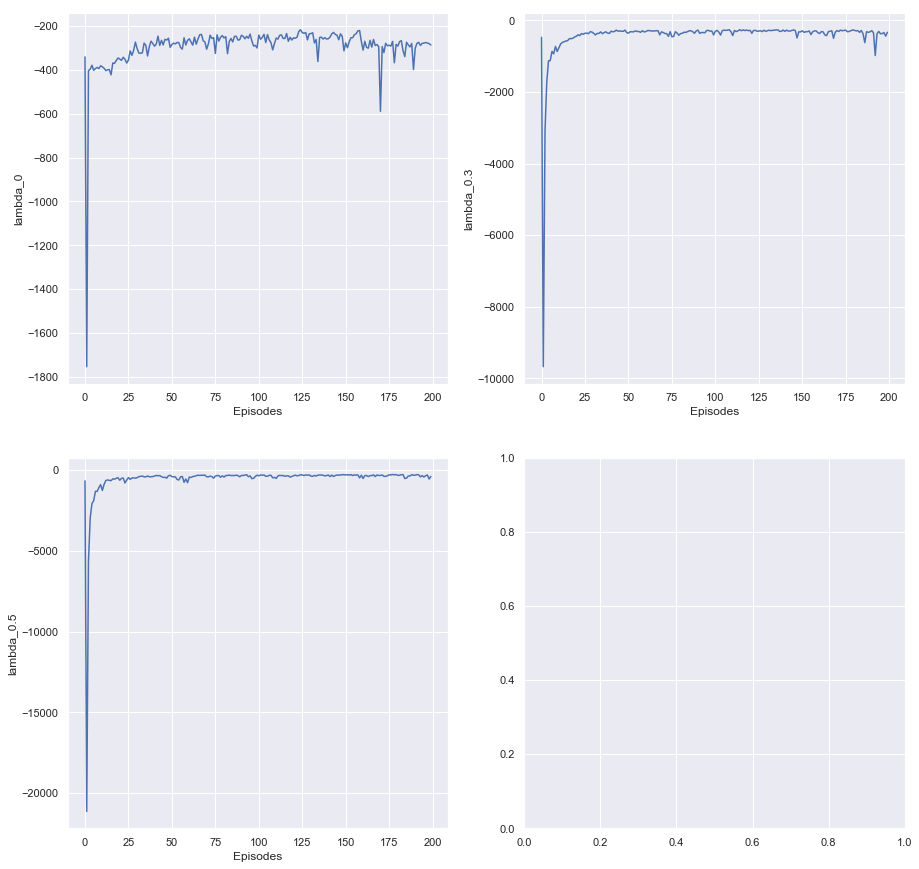

In [6]:
average_returns_ = average_returns / 100
data = pd.DataFrame(average_returns_)
episodes = np.arange(200)
average_returns_ = np.vstack((average_returns_, episodes))
data = pd.DataFrame(average_returns_.T)
data.columns = ['lambda_0', 'lambda_0.3', 'lambda_0.5', 'Episodes']

f, axs = plt.subplots(2,2,figsize=(15,15))
# linear
plt.subplot(221)
ax = plt.gca()
ax = sns.lineplot(y='lambda_0', x='Episodes', data=data, ci=50)
plt.grid(True)


# log
plt.subplot(222)
ax = plt.gca()
ax = sns.lineplot(y='lambda_0.3', x='Episodes', data=data)
plt.grid(True)


# symmetric log
plt.subplot(223)
ax = plt.gca()
ax = sns.lineplot(y='lambda_0.5', x='Episodes', data=data)
plt.grid(True)
plt.savefig('Average_returns')



### Generate the GIF

NameError: name 'valueArray' is not defined

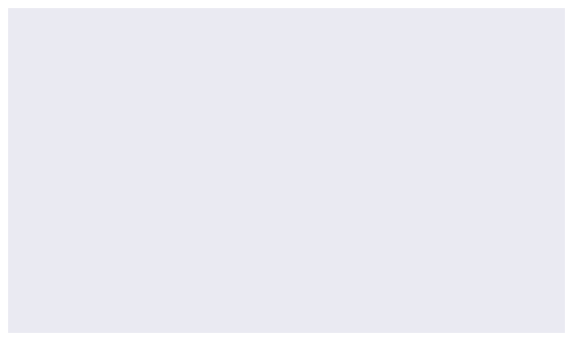

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

z = np.flip(np.array(valueArray)[0].reshape(4,12), 0)
profile = ax.pcolormesh(z,cmap='magma')
tos = fig.text(0.01, 0.98, '', horizontalalignment='left',
               verticalalignment='top')
cb = fig.colorbar(profile, ax=ax, pad=0.03, fraction=0.08)


def init_gif():
    'plot the first frame'

    profile.set_array(np.zeros(200))
    tos.set_text('Episode = 0')
    return [profile, tos]
    
def gif(n):
    'update the frame with the next row of data'

    z = np.flip(np.array(valueArray)[n].reshape(4,12), 0)
    profile.set_array(z.ravel())
    t = 'Episode = {:d}'.format(n)
    tos.set_text(t)
    return [profile, tos]

plt.tight_layout()
anim = animation.FuncAnimation(fig, update, init_func=init_gif, frames=np.array(valueArray).shape[0],
                               blit=False, interval=500, repeat=False)

anim.save('lambda_0.5.gif', writer='imagemagick', fps=15)